<a href="https://colab.research.google.com/github/wakamezake/ImageDataAugmentor/blob/features%2Fsupport_package/samples/use_albumentations_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install albumentations

     |████████████████████████████████| 634kB 8.6MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=b62d0649f01a721050eb5e3dd669226dee3fd56b69d5033c3e7a45aa9b1c4b4b
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [9]:
!git clone -b features/support_package https://github.com/wakamezake/ImageDataAugmentor.git

Cloning into 'ImageDataAugmentor'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 316 (delta 82), reused 89 (delta 39), pack-reused 165
Receiving objects: 100% (316/316), 152.83 KiB | 790.00 KiB/s, done.
Resolving deltas: 100% (181/181), done.


In [10]:
%cd ImageDataAugmentor/

/content/ImageDataAugmentor


In [0]:
%rm -r  ImageDataAugmentor/

In [7]:
%cd ..

/content


In [11]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating ImageDataAugmentor.egg-info
writing ImageDataAugmentor.egg-info/PKG-INFO
writing dependency_links to ImageDataAugmentor.egg-info/dependency_links.txt
writing requirements to ImageDataAugmentor.egg-info/requires.txt
writing top-level names to ImageDataAugmentor.egg-info/top_level.txt
writing manifest file 'ImageDataAugmentor.egg-info/SOURCES.txt'
writing manifest file 'ImageDataAugmentor.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying ImageDataAugmentor.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying ImageDataAugmentor.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying ImageDataAugmentor.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying ImageDataAugmentor.egg-info/requires

In [0]:
from ida.image_data_augmentor import ImageDataAugmentor
from albumentations import Compose
from albumentations.augmentations.transforms import Flip, RandomRotate90, ShiftScaleRotate, RandomCrop, Cutout

width, height = 32, 32

AUGMENTATIONS = Compose([
    Flip(),
    RandomRotate90(),
    ShiftScaleRotate(),
    RandomCrop(width=width, height=height),
    Cutout()
])

In [0]:
datagen = ImageDataAugmentor(
        rescale=1./255,
        augment=AUGMENTATIONS,
        preprocess_input=None)

In [0]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
datagen.fit(x_train)

In [0]:
for images in datagen.flow(x_train, batch_size=64):
    break

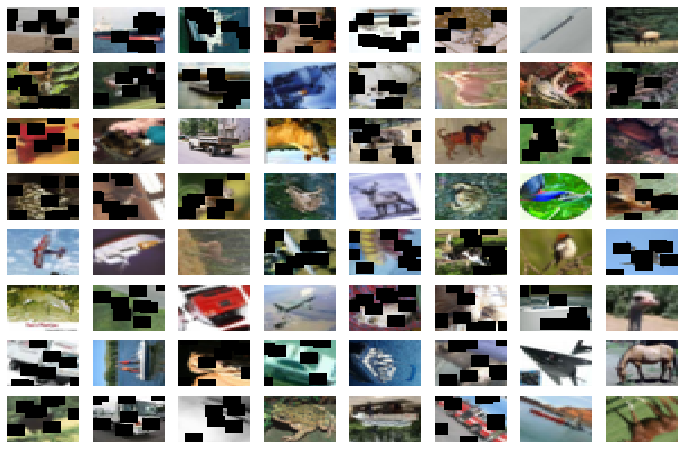

In [95]:
fig = plt.figure(figsize=(12, 8))
for i in range(images.shape[0]):
    ax = plt.subplot(8,8,i+1)
    ax.imshow(images[i], aspect='auto')
    ax.axis("off")
plt.show()